### Bài tập 1

In [15]:
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
  return features_X, sales_Y

In [16]:
# Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [17]:
# Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


### Bài tập 2

In [18]:
def generate_random_value(bound = 10):
    return random.uniform(-bound/2, bound/2)

def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual 

In [19]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


### Bài tập 3

In [20]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [21]:
# Question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


### Bài tập 4

In [22]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    
    return individual1_new, individual2_new

In [23]:
# Question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


### Bài tập 5

In [24]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()    
    return individual_m

In [25]:
# Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


### Bài tập 6

In [28]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

### Bài tập 7

In [31]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

### Bài tập 8

In [32]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome:", sorted_population[m-1])
        
    new_population = []
    while len(new_population) < m - elitism:
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)
        
        individual1, individual2 = crossover(individual1, individual2)
        
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)
        
        new_population.append(individual1)
        new_population.append(individual2)
        
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population, compute_loss(sorted_population[m-1]) 

In [33]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.05152880501 with chromsome: [3.44, 2.57, -0.79, -2.41]


### Bài tập 9

In [37]:
def run_GA():
    n_generations = 100
    m = 600
    population = initializePopulation(m)
    losses_lst = []
    for i in range(n_generations):
        population, losses = create_new_population(population, 2, i)
        losses_lst.append(losses)
    return losses_lst

### Bài tập 10

Best loss: 370.34911263960885 with chromsome: [4.682195268912626, 0.0012411903892706189, -0.7780884449110603, 0.528521489569681]
Best loss: 370.34911263960885 with chromsome: [4.682195268912626, 0.0012411903892706189, -0.7780884449110603, 0.528521489569681]
Best loss: 147.32905599716622 with chromsome: [4.682195268912626, 0.0012411903892706189, -0.10291089798272535, 0.528521489569681]
Best loss: 134.02707223959857 with chromsome: [3.2876401301090485, 0.11440614710681696, 0.08181297363926587, -0.40517939854236573]
Best loss: 134.02707223959857 with chromsome: [3.2876401301090485, 0.11440614710681696, 0.08181297363926587, -0.40517939854236573]
Best loss: 66.5113901743582 with chromsome: [4.219090077794494, 0.0012411903892706189, 0.2845477731132262, -0.06546480917723918]
Best loss: 66.5113901743582 with chromsome: [4.219090077794494, 0.0012411903892706189, 0.2845477731132262, -0.06546480917723918]
Best loss: 66.5113901743582 with chromsome: [4.219090077794494, 0.0012411903892706189, 0.284

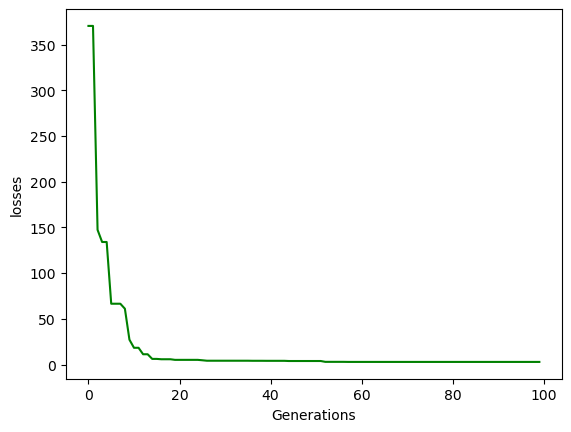

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses_lst):
    plt.plot(losses_lst, c='g')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

### Bài tập 11

[-3.0174344406327336, -0.2848036454328873, 0.49563730550055696, 0.46436406156391885]


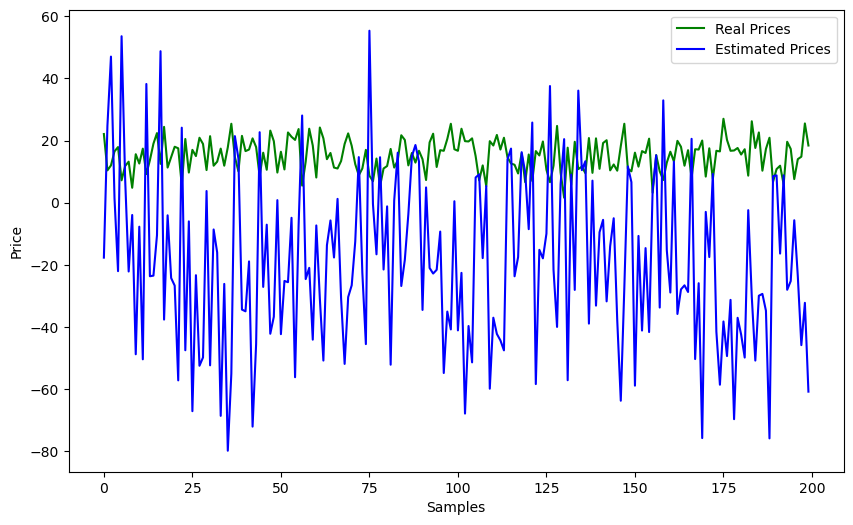

In [40]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    population = initializePopulation(m=100)
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c*x for x, c in zip(feature, theta))
        estimated_prices.append(estimated_price)

    _, _ = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()